In [1]:
import torch
from torchvision import transforms
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

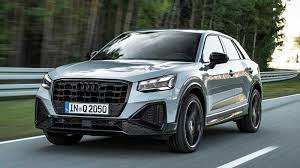

In [2]:
# load one image
img = Image.open('./data/cars/train/Audi/1.jpg')
img

In [12]:
64*64, 32*32, 16*16, 24*24

(4096, 1024, 256, 576)

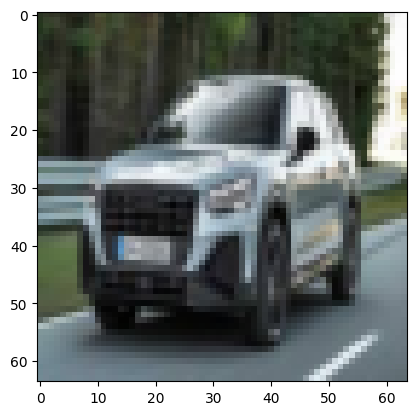

In [3]:
# check resize
resize = transforms.Resize((64, 64))

plt.imshow(resize(img))

In [4]:
id_to_class = {
    0: "Audi",
    1: "Hyundai",
    2: "Rolls Royce",
    3: "Swift",
    4: "Toyota"
}

In [5]:
# index to class
index_to_class = []

In [6]:
# resize all images
index = 0
for folder in ['train', 'test']:
    for brand_index, brand in enumerate(['Audi', 'Hyundai Creta', 'Rolls Royce', 'Swift', 'Toyota Innova']):
        # check num of files in dir
        size = len(os.listdir(f'./data/cars/{folder}/{brand}'))

        index_to_class.append(index)

        # loop through each file in dir
        for subdir, dirs, files, in os.walk(f'./data/cars/train/{brand}'):
            for file in files:
                img = Image.open(subdir + os.sep + file)
                img = resize(img)
                img.save(f'./data/cars/temp/{index}.jpg')
                index += 1

In [9]:
index_to_class

[0, 814, 1085, 1396, 1820, 2595, 3409, 3680, 3991, 4415]

In [11]:
import pickle
pickle.dump(index_to_class, open('./data/cars/index_to_class.pkl', 'wb'))

In [12]:
arry = pickle.load(open('./data/cars/index_to_class.pkl', 'rb'))